In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,NEAR BAY,248700.0
13114,-121.36,38.39,10.0,5121.0,763.0,2568.0,758.0,5.2447,INLAND,148100.0
13626,-117.27,34.11,44.0,567.0,134.0,565.0,150.0,1.8281,INLAND,62900.0
4989,-118.31,34.00,47.0,1551.0,362.0,1329.0,322.0,1.9792,<1H OCEAN,116400.0
6418,-118.00,34.15,43.0,2583.0,633.0,1544.0,617.0,2.5417,INLAND,178300.0
...,...,...,...,...,...,...,...,...,...,...
3905,-118.50,34.20,18.0,4249.0,933.0,2047.0,909.0,4.1304,<1H OCEAN,229100.0
20257,-119.16,34.20,35.0,2183.0,636.0,3504.0,623.0,1.9704,NEAR OCEAN,160300.0
5553,-118.37,33.95,5.0,6955.0,2062.0,3591.0,1566.0,3.1110,<1H OCEAN,247600.0
11708,-120.20,39.12,15.0,2146.0,361.0,197.0,76.0,4.1316,INLAND,200000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

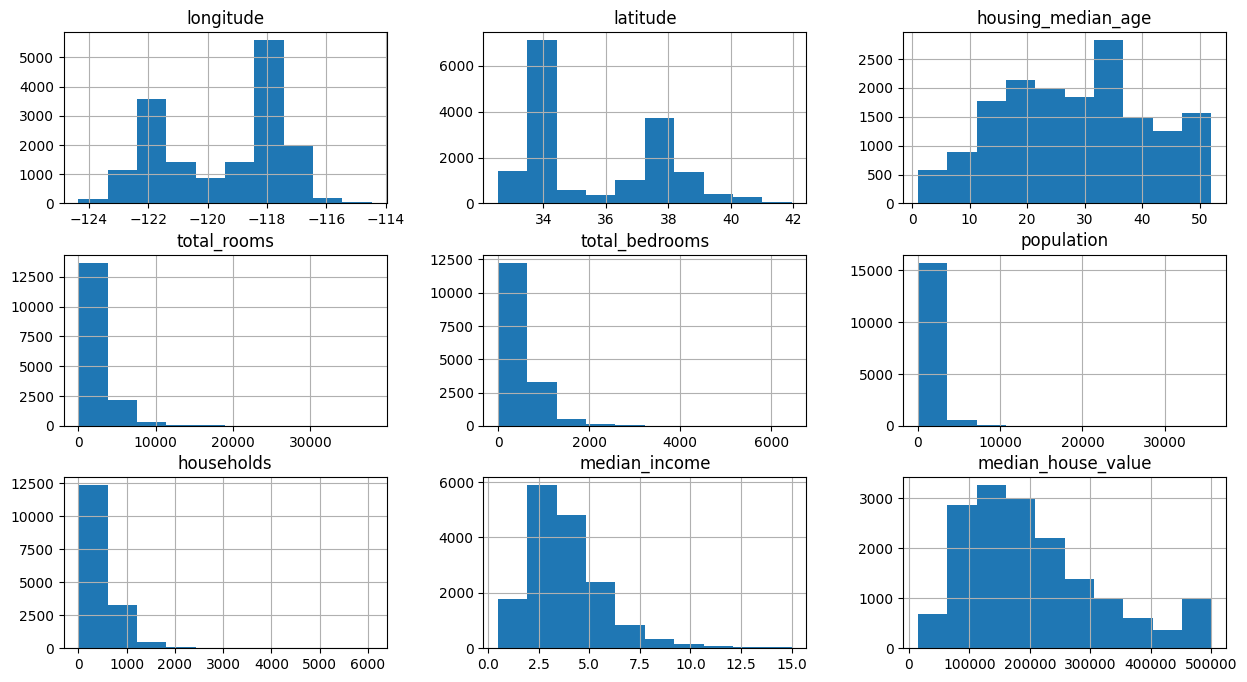

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

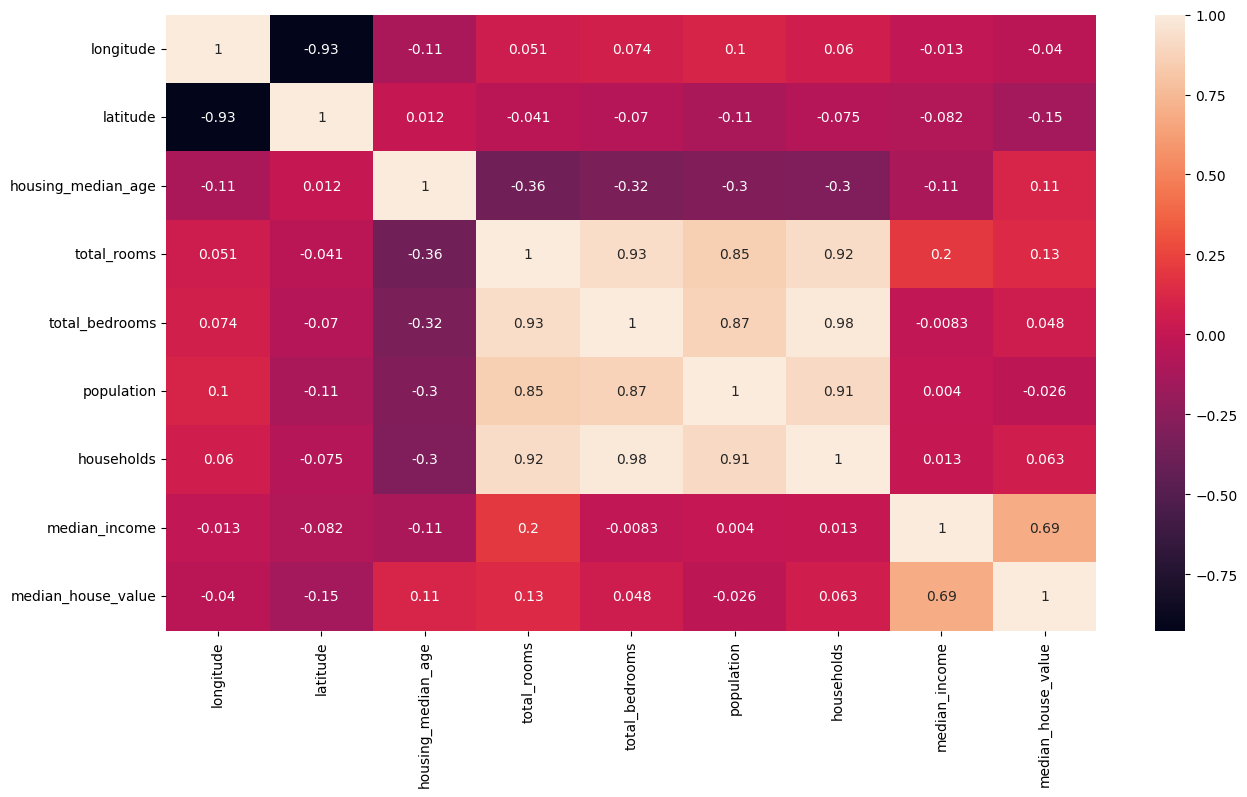

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

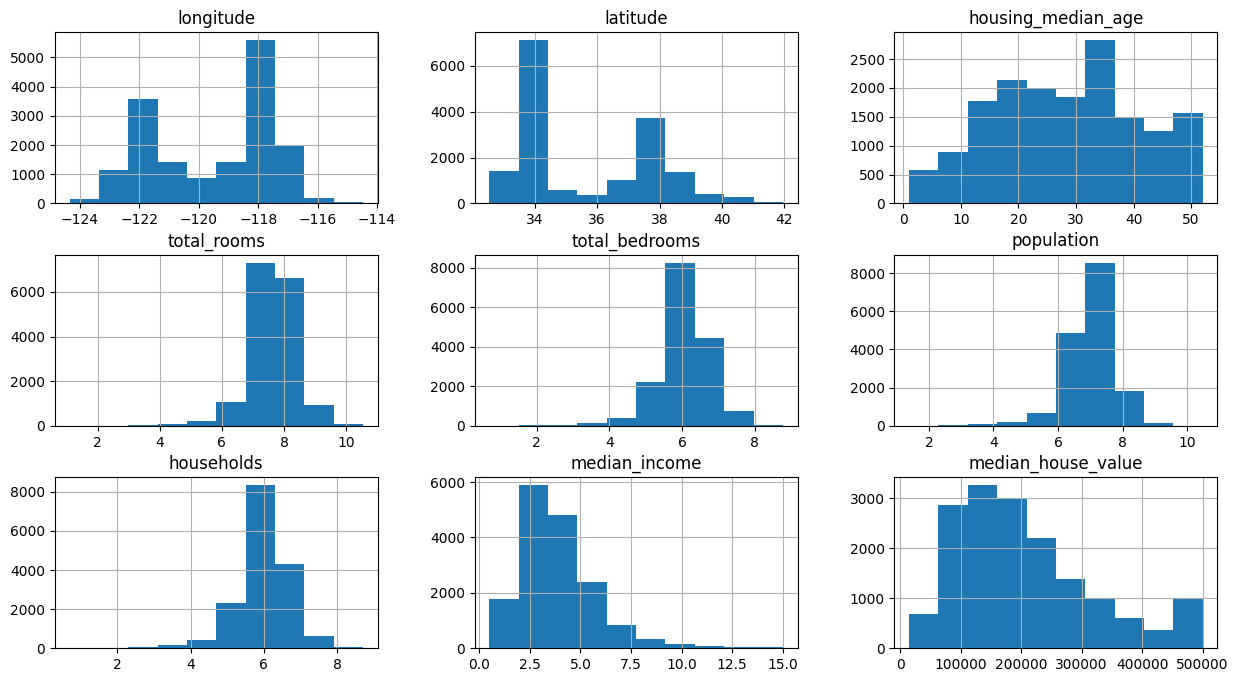

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

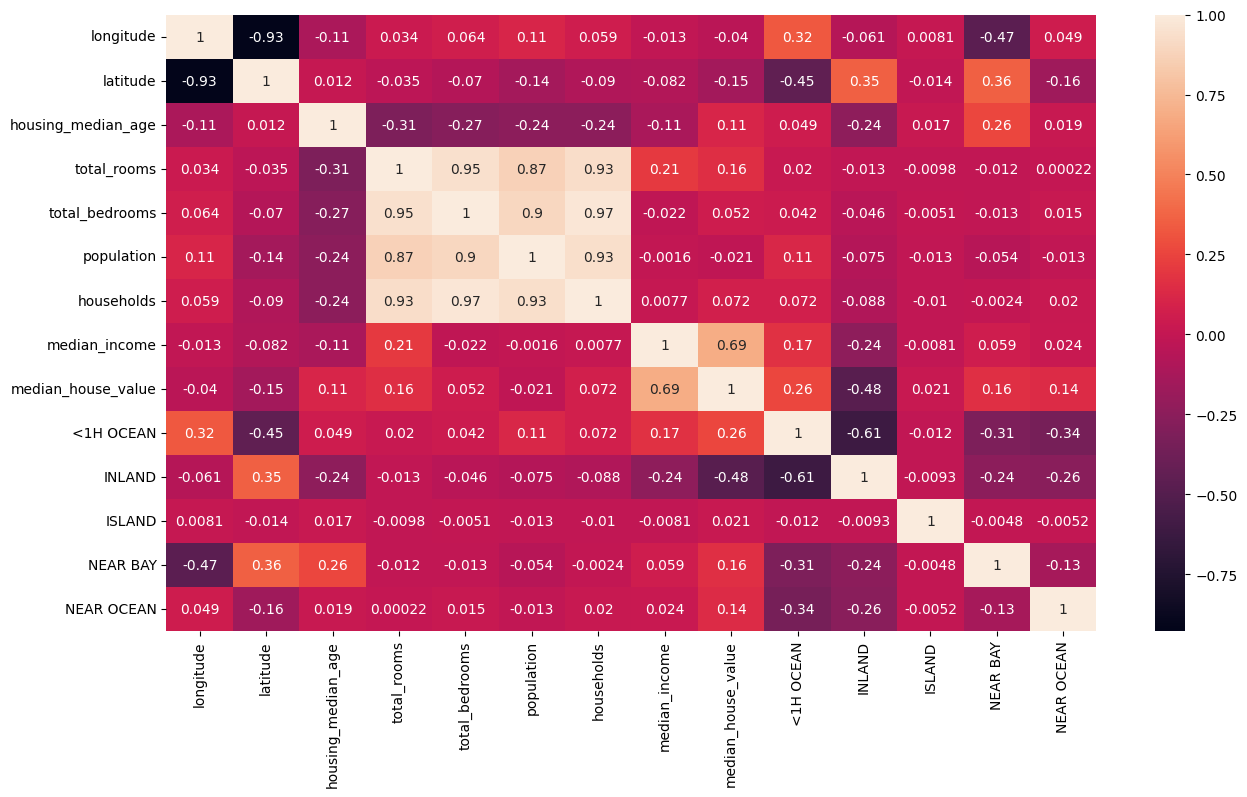

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

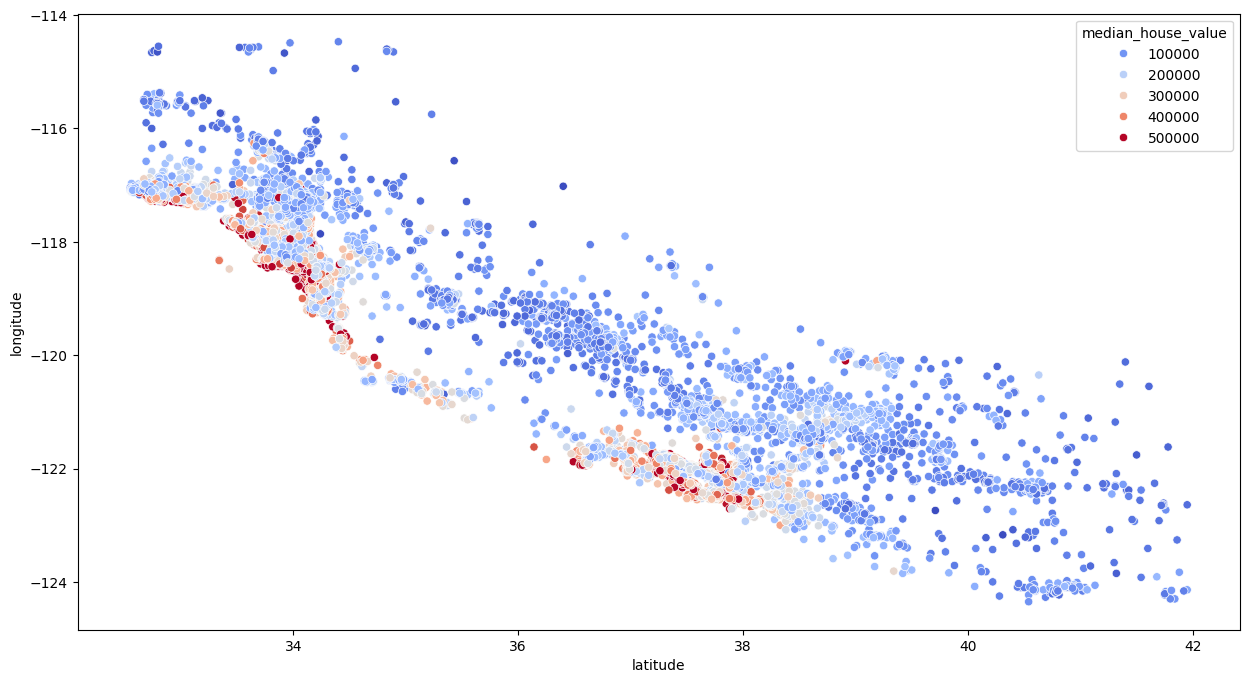

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [17]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

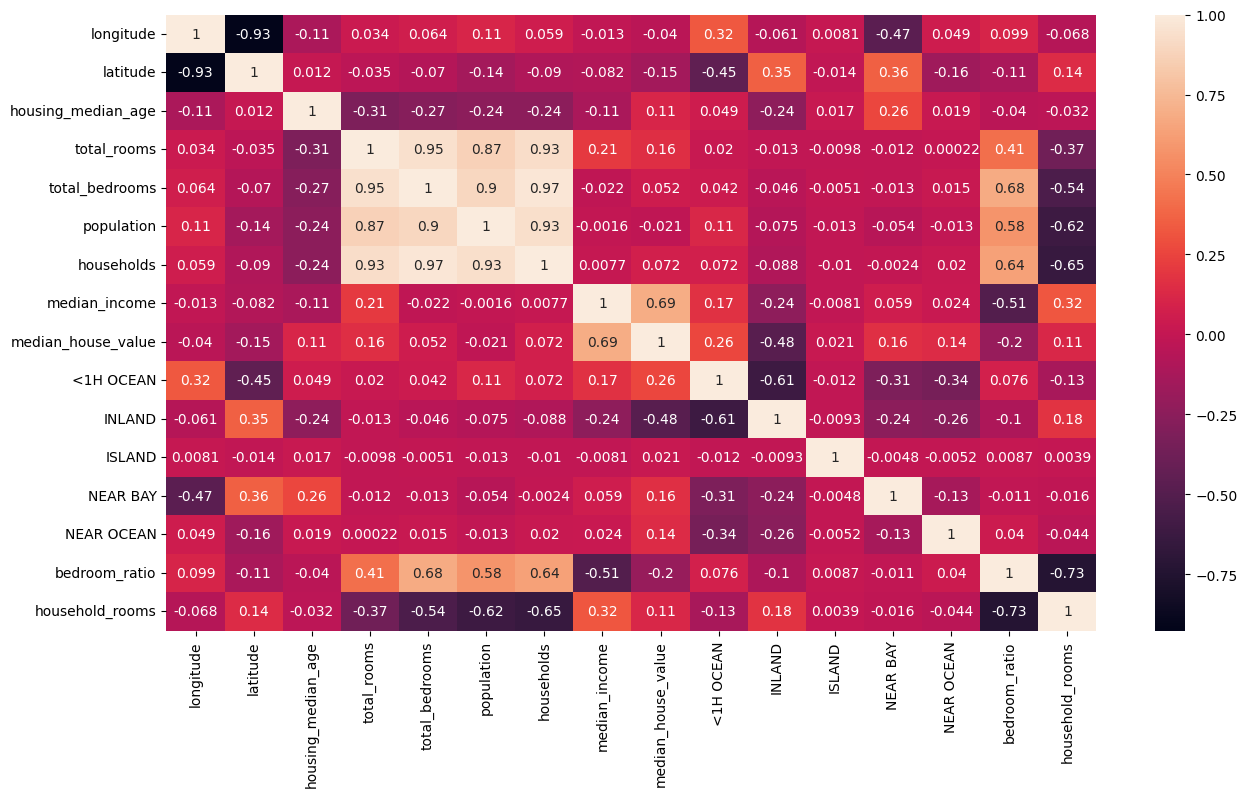

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1) , train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [21]:
X_test,y_test = test_data.drop(['median_house_value'],axis=1) , test_data['median_house_value']

In [22]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9337,-122.59,37.97,46.0,8.303257,6.753438,7.535297,6.726233,4.5625,False,False,False,False,True,0.813348,1.234459
4695,-118.37,34.07,44.0,7.902487,6.498282,6.952729,6.429719,3.2010,True,False,False,False,False,0.822308,1.229056
4917,-118.26,34.01,43.0,7.687080,6.526495,7.872836,6.413459,1.8641,True,False,False,False,False,0.849021,1.198586
10444,-117.61,33.43,24.0,7.742402,5.991465,6.747587,5.940171,3.9875,False,False,False,False,True,0.773851,1.303397
20580,-121.77,38.76,32.0,7.576097,5.955837,7.044033,5.897154,2.8365,False,True,False,False,False,0.786135,1.284704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15057,-116.91,32.80,32.0,7.572503,5.662960,6.986566,5.680173,5.6846,True,False,False,False,False,0.747832,1.333147
2542,-124.17,40.80,52.0,7.351158,5.843544,6.632002,5.768321,1.8529,False,False,False,False,True,0.794915,1.274402
20413,-118.87,34.18,21.0,8.641532,7.222566,8.067463,7.177019,3.4676,True,False,False,False,False,0.835797,1.204056
11036,-117.82,33.78,28.0,8.408717,6.504288,7.625107,6.530878,5.4562,True,False,False,False,False,0.773517,1.287532


In [23]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1696,-122.27,38.00,12.0,7.373374,5.493061,6.877296,5.455321,6.1576,False,False,False,True,False,0.744986,1.351593
13114,-121.36,38.39,10.0,8.541300,6.638568,7.851272,6.632002,5.2447,False,True,False,False,False,0.777232,1.287892
13626,-117.27,34.11,44.0,6.342121,4.905275,6.338594,5.017280,1.8281,False,True,False,False,False,0.773444,1.264056
4989,-118.31,34.00,47.0,7.347300,5.894403,7.192934,5.777652,1.9792,True,False,False,False,False,0.802254,1.271676
6418,-118.00,34.15,43.0,7.857094,6.452049,7.342779,6.426488,2.5417,False,True,False,False,False,0.821175,1.222611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-118.50,34.20,18.0,8.354674,6.839476,7.624619,6.813445,4.1304,True,False,False,False,False,0.818641,1.226204
20257,-119.16,34.20,35.0,7.688913,6.456770,8.161946,6.436150,1.9704,False,False,False,False,True,0.839751,1.194645
5553,-118.37,33.95,5.0,8.847360,7.631917,8.186464,7.356918,3.1110,True,False,False,False,False,0.862621,1.202590
11708,-120.20,39.12,15.0,7.671827,5.891644,5.288267,4.343805,4.1316,False,True,False,False,False,0.767958,1.766153


In [24]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [25]:
X_test_s = scaler.transform(X_test)

In [26]:
reg.score(X_test_s,y_test)

0.6705898015983714

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
forest.score(X_test,y_test)

0.829039454508322

In [29]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
   "n_estimators": [3,10,30],
   "min_samples_split": [2,4,6,8],
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train_s,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'min_samples_split': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(X_test,y_test)

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-3.0374590297923856